In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [320]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.526934  1.048462  1.576123  2.127945   
1      hashing_cerrado_lineal  0.410097  0.814016  1.233385  1.676153   
2  hashing_cerrado_cuadratico  0.396681  0.794486  1.228704  1.668910   
3       hashing_cerrado_doble  0.400147  0.811412  1.244337  1.714692   
4          std::unordered_map  0.322889  0.639547  0.961252  1.331624   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.627508  3.163903  3.680004  4.250845  4.784330  ...  5.985939  6.642158   
1  2.070021  2.486028  2.869401  3.358406  3.737344  ...  4.607992  5.065259   
2  2.089660  2.513880  2.921175  3.354603  3.776076  ...  4.643214  5.249860   
3  2.163553  2.575801  2.989148  3.436225  3.835423  ...  4.749335  5.279511   
4  1.655635  1.985627  2.324224  2.711195  2.986464  ...  3.730914  4.149701   

      13000     14000     15000     16000     17000     18000      19000  \
0  7

In [321]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.526934    0.067426
1      hashing_cerrado_lineal        1000  0.410097    0.069014
2  hashing_cerrado_cuadratico        1000  0.396681    0.044495
3       hashing_cerrado_doble        1000  0.400147    0.058678
4          std::unordered_map        1000  0.322889    0.032223
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.765216    0.051743
1      hashing_cerrado_lineal        1000  0.667378    0.041426
2  hashing_cerrado_cuadratico        1000  0.660475    0.074880
3       hashing_cerrado_doble        1000  0.855625    0.101680
4          std::unordered_map        1000  0.370277    0.044276


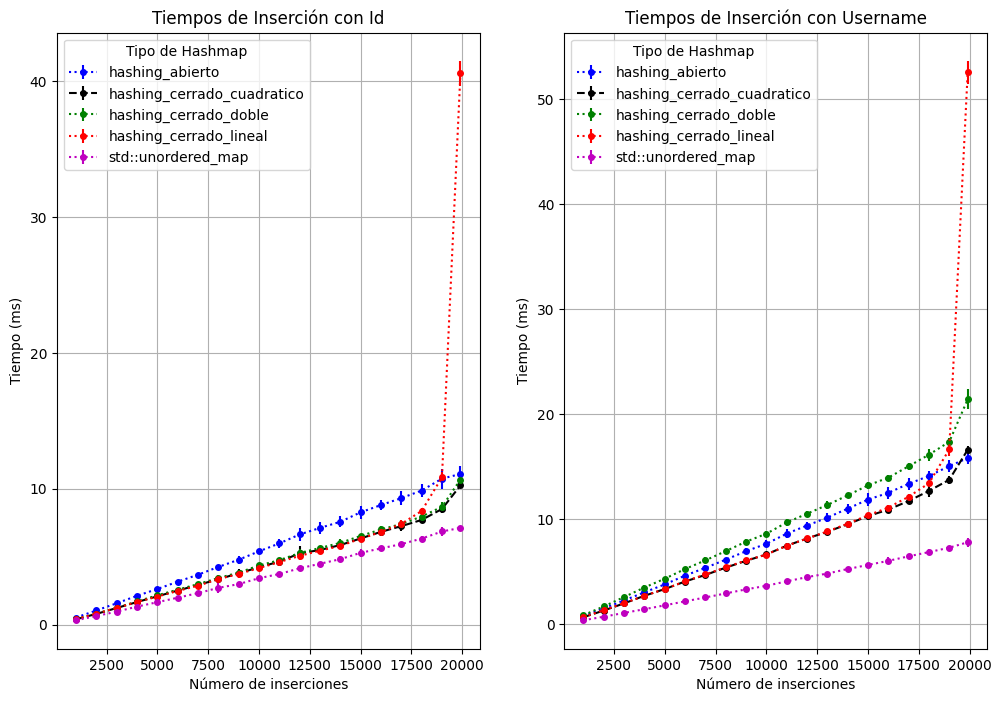

In [322]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [323]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa  0.300000  0.350000  0.400000  0.450000  \
0             hashing_abierto  0.687588  0.723902  0.779833  0.861093   
1      hashing_cerrado_lineal  0.658819  0.675236  0.729237  0.802585   
2  hashing_cerrado_cuadratico  0.658220  0.681463  0.714196  0.788878   
3       hashing_cerrado_doble  0.708916  0.743257  0.809455  0.833922   
4          std::unordered_map  0.524757  0.549837  0.584513  0.632474   

   0.500000  0.550000  0.600000  0.650000  0.700000  0.750000  0.800000  \
0  0.913454  1.029654  1.132191  1.168488  1.319951  1.388239  1.416781   
1  0.840699  0.934549  1.061272  1.090213  1.235705  1.309123  1.406676   
2  0.830810  0.932472  0.989356  1.040518  1.164265  1.232554  1.254608   
3  0.933814  1.003920  1.126144  1.067906  1.306449  1.348497  1.417090   
4  0.672443  0.748411  0.808623  0.829884  0.932358  0.948956  0.950424   

   0.850000  0.900000  0.950000  
0  1.532336  1.664451  1.678783  
1  1.601263  1.884646  2.362393  
2  1.384

In [324]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]



df_id_melted["factor"] = df_id_melted["factor"].astype(float)
df_usr_melted["factor"] = df_usr_melted["factor"].astype(float)

#df_id_melted = df_id_melted.drop(df_id_melted[df_id_melted["busquedas"] > 15000].index)
#df_usr_melted = df_usr_melted.drop(df_usr_melted[df_usr_melted["busquedas"] > 15000].index)

print(df_id_melted.head())
print(df_usr_melted.head())


                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  0.687588    0.121525
1      hashing_cerrado_lineal     0.3  0.658819    0.080614
2  hashing_cerrado_cuadratico     0.3  0.658220    0.109515
3       hashing_cerrado_doble     0.3  0.708916    0.102492
4          std::unordered_map     0.3  0.524757    0.069727
                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  1.646164    0.137522
1      hashing_cerrado_lineal     0.3  1.632987    0.125050
2  hashing_cerrado_cuadratico     0.3  1.632429    0.072138
3       hashing_cerrado_doble     0.3  2.549529    0.093989
4          std::unordered_map     0.3  0.656780    0.072857


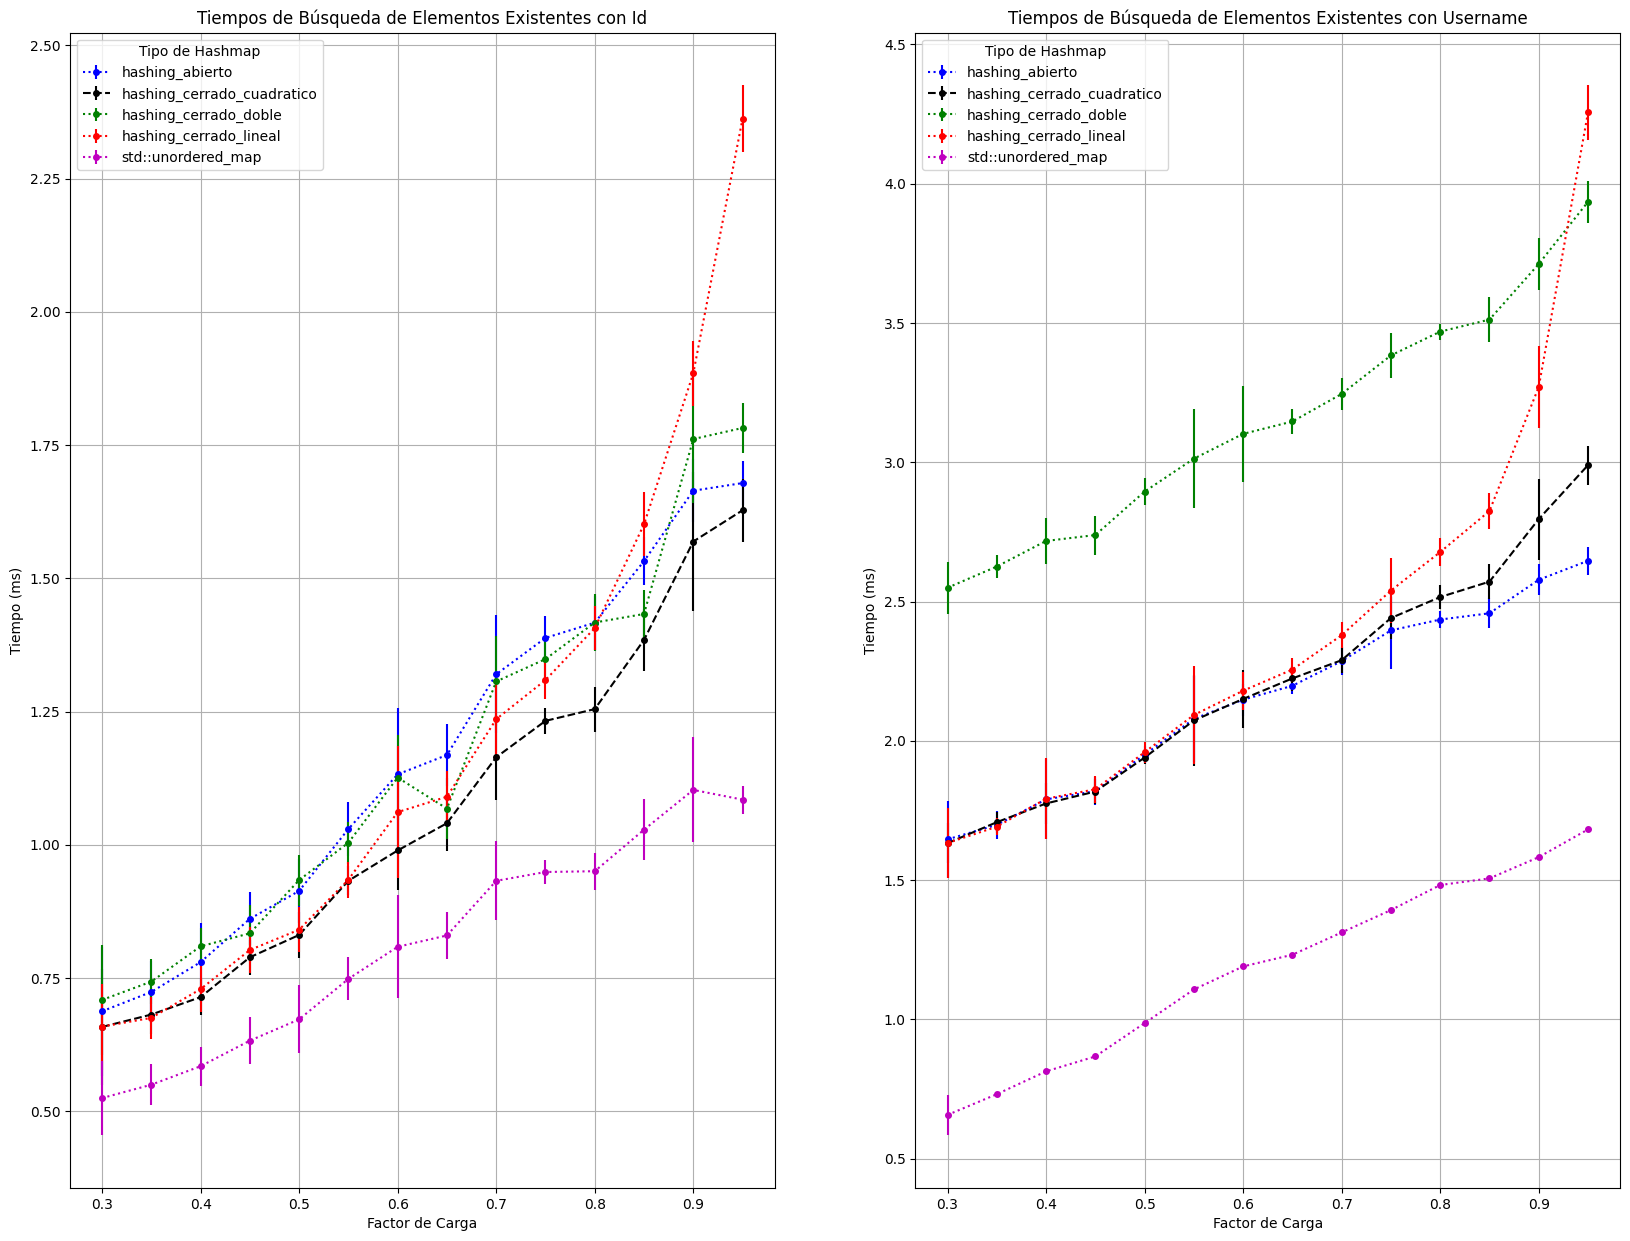

In [325]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Factor de Carga")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [326]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa  0.300000  0.350000  0.400000  0.450000  \
0             hashing_abierto  0.411102  0.377232  0.392064  0.408318   
1      hashing_cerrado_lineal  0.390106  0.408255  0.414892  0.447133   
2  hashing_cerrado_cuadratico  0.372975  0.372182  0.400010  0.434583   
3       hashing_cerrado_doble  0.422901  0.444302  0.452555  0.488818   
4          std::unordered_map  0.429168  0.412125  0.435244  0.465214   

   0.500000  0.550000  0.600000  0.650000  0.700000  0.750000  0.800000  \
0  0.492319  0.456330  0.463881  0.486716  0.526393  0.567929  0.587632   
1  0.538228  0.524894  0.553148  0.608936  0.747453  0.920305  1.173149   
2  0.521680  0.499212  0.528028  0.565380  0.648225  0.741525  0.849387   
3  0.599607  0.562176  0.579339  0.623746  0.721673  0.827638  0.955809   
4  0.593812  0.549000  0.575879  0.620776  0.708159  0.789188  0.858792   

   0.850000  0.900000   0.950000  
0  0.614813  0.682529   0.710440  
1  1.819047  4.423259  14.640535  
2  1.

In [327]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="factor", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]



df_id_melted["factor"] = df_id_melted["factor"].astype(float)
df_usr_melted["factor"] = df_usr_melted["factor"].astype(float)

#df_id_melted = df_id_melted.drop(df_id_melted[df_id_melted["busquedas"] > 15000].index)
#df_usr_melted = df_usr_melted.drop(df_usr_melted[df_usr_melted["busquedas"] > 15000].index)

print(df_id_melted.head())
print(df_usr_melted.head())

                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  0.411102    0.124694
1      hashing_cerrado_lineal     0.3  0.390106    0.084339
2  hashing_cerrado_cuadratico     0.3  0.372975    0.037953
3       hashing_cerrado_doble     0.3  0.422901    0.061887
4          std::unordered_map     0.3  0.429168    0.161690
                         mapa  factor    tiempo  tiempo_err
0             hashing_abierto     0.3  1.308009    0.123252
1      hashing_cerrado_lineal     0.3  1.314338    0.091711
2  hashing_cerrado_cuadratico     0.3  1.307198    0.102073
3       hashing_cerrado_doble     0.3  2.189228    0.194583
4          std::unordered_map     0.3  0.502566    0.141901


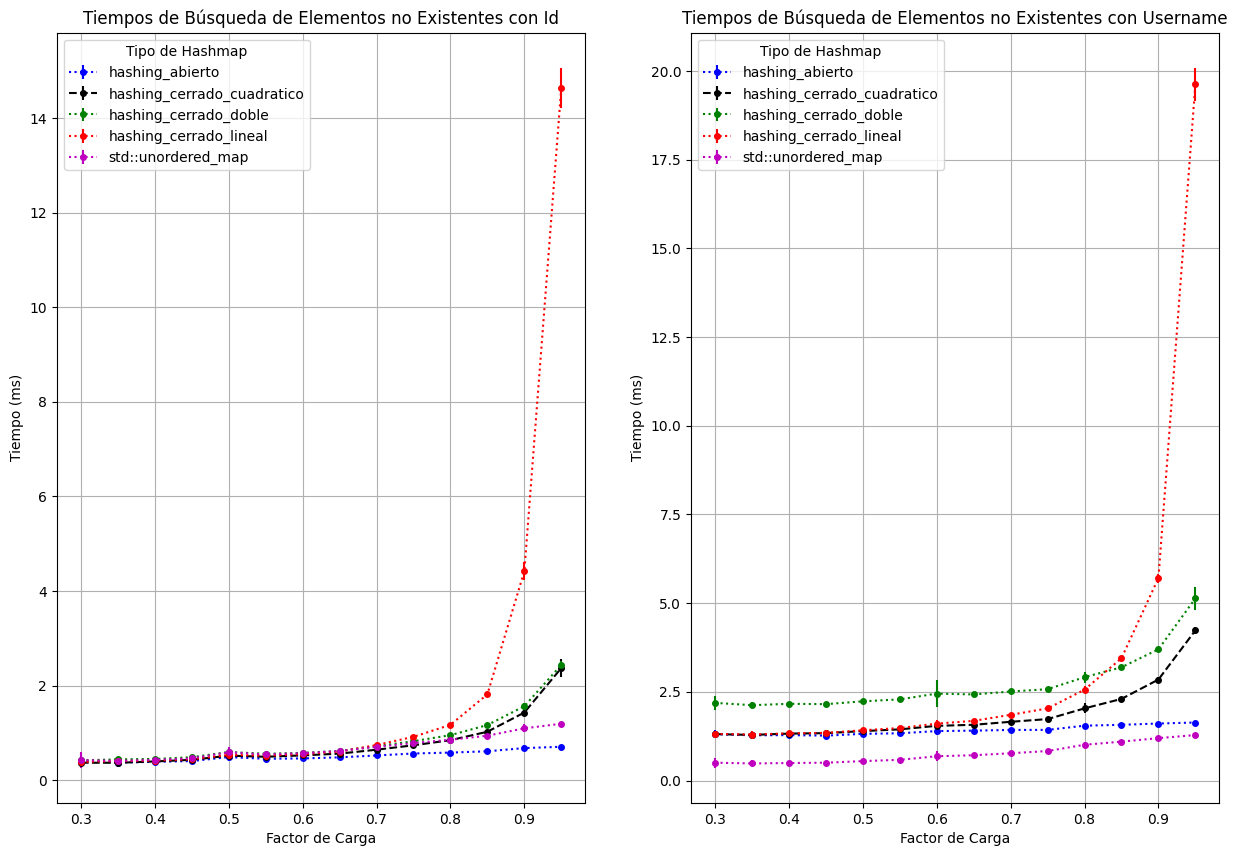

In [328]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["factor"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Factor de Carga")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()